In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [12]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

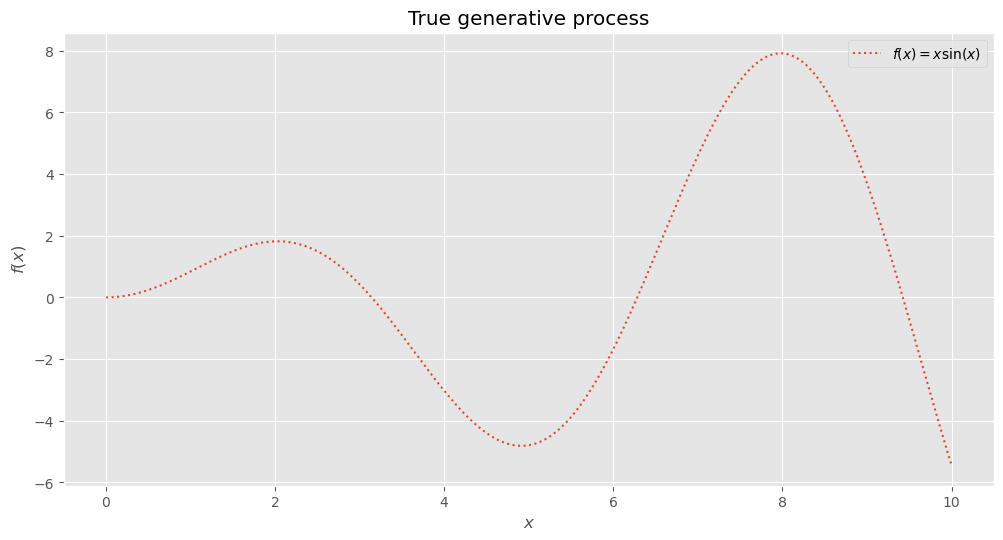

In [14]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [15]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

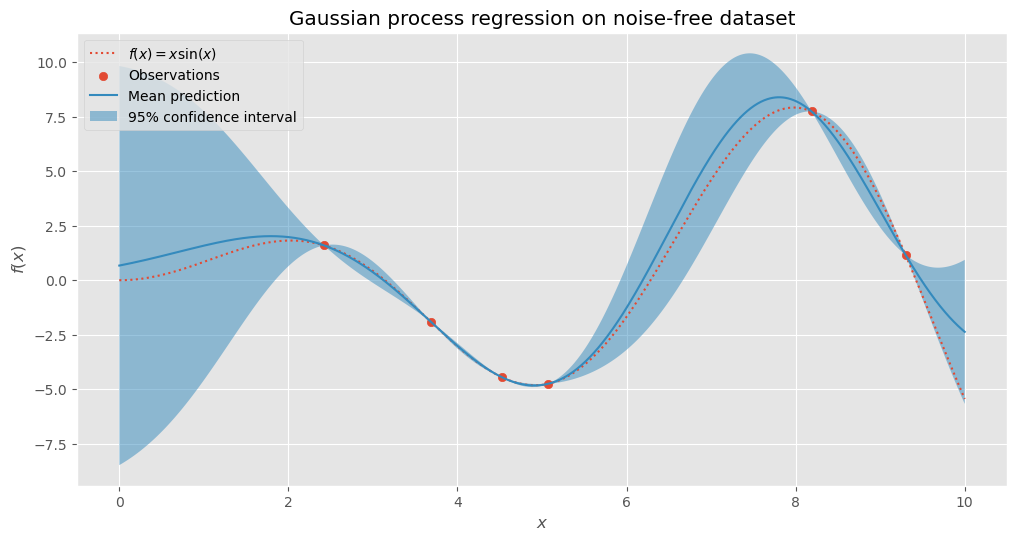

In [17]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")


In [18]:
X_train

array([[5.07507508],
       [8.18818819],
       [4.52452452],
       [3.68368368],
       [2.42242242],
       [9.2992993 ]])

In [19]:
X

array([[ 0.        ],
       [ 0.01001001],
       [ 0.02002002],
       [ 0.03003003],
       [ 0.04004004],
       [ 0.05005005],
       [ 0.06006006],
       [ 0.07007007],
       [ 0.08008008],
       [ 0.09009009],
       [ 0.1001001 ],
       [ 0.11011011],
       [ 0.12012012],
       [ 0.13013013],
       [ 0.14014014],
       [ 0.15015015],
       [ 0.16016016],
       [ 0.17017017],
       [ 0.18018018],
       [ 0.19019019],
       [ 0.2002002 ],
       [ 0.21021021],
       [ 0.22022022],
       [ 0.23023023],
       [ 0.24024024],
       [ 0.25025025],
       [ 0.26026026],
       [ 0.27027027],
       [ 0.28028028],
       [ 0.29029029],
       [ 0.3003003 ],
       [ 0.31031031],
       [ 0.32032032],
       [ 0.33033033],
       [ 0.34034034],
       [ 0.35035035],
       [ 0.36036036],
       [ 0.37037037],
       [ 0.38038038],
       [ 0.39039039],
       [ 0.4004004 ],
       [ 0.41041041],
       [ 0.42042042],
       [ 0.43043043],
       [ 0.44044044],
       [ 0

In [20]:
mean_prediction

array([ 6.72399830e-01,  6.80020238e-01,  6.87690911e-01,  6.95411578e-01,
        7.03181960e-01,  7.11001760e-01,  7.18870675e-01,  7.26788385e-01,
        7.34754559e-01,  7.42768852e-01,  7.50830909e-01,  7.58940359e-01,
        7.67096820e-01,  7.75299895e-01,  7.83549175e-01,  7.91844239e-01,
        8.00184650e-01,  8.08569958e-01,  8.16999701e-01,  8.25473401e-01,
        8.33990570e-01,  8.42550701e-01,  8.51153277e-01,  8.59797766e-01,
        8.68483621e-01,  8.77210282e-01,  8.85977174e-01,  8.94783708e-01,
        9.03629281e-01,  9.12513274e-01,  9.21435055e-01,  9.30393978e-01,
        9.39389382e-01,  9.48420589e-01,  9.57486909e-01,  9.66587636e-01,
        9.75722051e-01,  9.84889417e-01,  9.94088985e-01,  1.00331999e+00,
        1.01258165e+00,  1.02187317e+00,  1.03119375e+00,  1.04054254e+00,
        1.04991873e+00,  1.05932145e+00,  1.06874982e+00,  1.07820298e+00,
        1.08768000e+00,  1.09717999e+00,  1.10670200e+00,  1.11624510e+00,
        1.12580831e+00,  